# **Decision Stump by hand**

---





---

Implementing a one-level decision tree, or decision stump.
We use the CART algorithm (Classification And Regression Tree). Recall the Gini’s index measuring the impurity is defined as:

\begin{equation*}
G_i = 1 - \sum_{k=1}^{N_\text{classes}} \left( \frac{N_{k, i}}{ N_i} \right)^2
\end{equation*}

The cost function is

\begin{equation*}
J(k, t_k) = \frac{n_\text{left}}{n_\text{node}} G_\text{left} + \frac{n_\text{right}}{n_\text{node}} G_\text{right} \;,
\end{equation*}

where
is a given feature and the threshold on that feature. We will use $|\Delta\eta_{jj}| $ and m_{jj} as our two input variables. The main function decision_stumper should return the optimized threshold and cost function values for a given feature. It should take as arguments:


*   the dataframe
*   the variable name of the input feature
*   the class name (column name where labels are stored)
*   the class values (in an array)
*    the numbers of threshold values swiping the interval of the feature







#    

1.1 Get and load the data



*   Getting the train dataset and load the relevant columns in a dataframe.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
!pwd

/content


In [4]:
ls -l

total 8
drwx------ 5 root root 4096 Feb  6 15:55 gdrive/
drwxr-xr-x 1 root root 4096 Feb  2 14:53 sample_data/


In [5]:
%cd /content/gdrive/

/content/gdrive


In [6]:
ls -l

total 4
drwx------ 4 root root 4096 Feb  6 15:55 MyDrive/


In [7]:
%cd MyDrive/

/content/gdrive/MyDrive


In [8]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



#    

1.1 Get and load the data



*   Getting the train dataset and load the relevant columns in a dataframe.

In [9]:
df = pd.read_csv('/content/gdrive/MyDrive/ATLAS_higgs_train.csv')
train = df[["detajj", "massjj","sample"]]
train

,detajj,massjj,sample
0,4.283580,556.406882,1
1,1.101106,266.768190,-1
2,2.394863,211.879331,-1
3,1.040268,56.235126,1
4,3.674720,351.241850,1
...,...,...,...
34995,0.139980,60.332091,-1
34996,4.084168,321.179218,-1
34997,0.471683,32.555787,-1
34998,0.042897,122.989028,-1


# **1.2 Compute the Gini index**



* We Write a function computing the Gini index value by making our code as general as possible.
followed in the next cell a series of tests.

*   Bonus: securing our code to prevent a division by zero.



In [10]:
def gini_index(X, keys, criteria):# spliting the dataset into groups according to the value of the sample.
  if X.shape[0] == 0:
    return -1 # This means an error in the entry size.
  else:
    if isinstance(criteria, list):
      list_df = []
      s = 0
      for i in range(len(criteria)):
        list_df.append(X[X[keys] == criteria[i]])
        s += (list_df[i].shape[0])**2
      gini = 1 - s/(X.shape[0]**2)
      return gini



*   **Testing**



In [11]:
test_df = pd.read_csv('/content/gdrive/MyDrive/ATLAS_higgs_train.csv')
test = test_df[["detajj", "massjj", "sample"]]

valid_df = pd.read_csv('/content/gdrive/MyDrive/ATLAS_higgs_train.csv')
valid = valid_df[["detajj", "massjj", "sample"]]

gini_index(train, 'sample', [1, -1]), gini_index(valid, 'sample', [1,-1]), gini_index(test, 'sample', [1,-1])

(0.5, 0.5, 0.5)

# **1.3 Calculate the cost**

*   We now write a function computing the cost function in the CART algorithm.



In [12]:
def cost_function(X, name, class_name, tk, criteria):
  left_set = X[X[name] < tk]
  right_set = X[X[name] >= tk]
  cost = (gini_index(left_set, class_name, criteria)*(left_set.shape[0]) +
          gini_index(right_set, class_name, criteria)*(right_set.shape[0]))/X.shape[0]
  return cost

*   **Testing**


In [13]:
tk = 0
cost_tk = []
while tk < 5:
  cost_tk.append((cost_function(train, 'detajj', 'sample', tk, [1, -1]), tk))
  tk += 0.05
print(cost_tk)

[(0.5, 0), (0.49978355208519704, 0.05), (0.49960941295256955, 0.1), (0.4996078436585293, 0.15000000000000002), (0.4993973969186623, 0.2), (0.49918652977634004, 0.25), (0.4988773518063561, 0.3), (0.4983853279352531, 0.35), (0.4981172896096437, 0.39999999999999997), (0.49749686616120964, 0.44999999999999996), (0.49691543272727273, 0.49999999999999994), (0.4964497502268879, 0.5499999999999999), (0.49576411529085235, 0.6), (0.49500239600180035, 0.65), (0.4943533562884977, 0.7000000000000001), (0.49379511913287694, 0.7500000000000001), (0.49305018887241814, 0.8000000000000002), (0.49199481516803684, 0.8500000000000002), (0.4910093087153913, 0.9000000000000002), (0.4902707043918149, 0.9500000000000003), (0.48973908922344, 1.0000000000000002), (0.48865113573575886, 1.0500000000000003), (0.48768714562734367, 1.1000000000000003), (0.48706827791107227, 1.1500000000000004), (0.48622550190237523, 1.2000000000000004), (0.48485663855497124, 1.2500000000000004), (0.48429099120850244, 1.30000000000000

# **1.4 Main function: code a Decision Stump**



* We write the main function decision_stumper that will call the functions defined above. Then Call our function on each input feature and conclude on the final cut for our decision stump.   



In [14]:
def decision_stump(X, var_name, class_name , class_value, number_treshold):
  max_val = max(X[var_name])
  min_val = min(X[var_name])
  step = (max_val - min_val)/number_treshold
  tk = min_val
  min_cost = 1
  min_tk = 0
  while tk < max_val:
    cost = cost_function(X, var_name, class_name, tk, class_value)
    if cost < min_cost:
      min_tk = tk
      min_cost = cost
    tk += step
  return min_tk, min_cost

*   **Testing using a threshold of 5000**


In [15]:
decision_stump(train, 'detajj', 'sample', [1, -1], 5000)

(2.60471835882665, 0.4657604237760141)

***We just coded a decision stump by hand!***

# **1.5 Plot the cut**



*   Let's Use a plot_scatter function to draw the line corresponding to the optimized threshold from the decision stump. We can use Matplotlib’s axhline or axvline method for drawing a horizontal or vertical line respectively. Let's try to be as general as possible in the input arguments.



In [16]:
# GLOBAL VARIABLES
XNAME = 'detajj'; XLABEL = r'$|\Delta\eta_{jj}|$'
YNAME = 'massjj'; YLABEL = r'$m_{jj}$ (GeV)'

inputs= [XNAME, YNAME] ;

XBINS = 5 ; XMIN = 0 ; XMAX = 5    ; XSTEP = 1
YBINS = 5 ; YMIN = 0 ; YMAX = 1000 ; YSTEP = 200

# Creating reduced datasets with detajj & massjj only
X_train = train[inputs] ; y_train = train['sample']
X_valid = valid[inputs] ; y_valid = valid['sample']
X_test  =  test[inputs] ; y_test  =  test['sample']

In [17]:
def plot_scatter(sig, bkg, ds=None, # decision surface
              xname=XNAME, xlabel=XLABEL, xmin=XMIN, xmax=XMAX, xstep=XSTEP,
              yname=YNAME, ylabel=YLABEL, ymin=YMIN, ymax=YMAX, ystep=YSTEP,
              fgsize=(6, 6), ftsize=16, alpha=0.3, title="Scatter plot"):
  tk = decision_stump(train, 'massjj', 'sample', [1, -1], 1000)[0]
  fig, ax = plt.subplots(figsize=fgsize)

  # Annotate x-axis
  ax.set_xlim(xmin, xmax)
  ax.set_xlabel(xlabel)
  ax.set_xticks(np.arange(xmin, xmax+xstep, xstep))

  # Annotate y-axis
  ax.set_ylim(ymin, ymax)
  ax.set_ylabel(ylabel)
  ax.set_yticks(np.arange(ymin, ymax+ystep, ystep))

  # Scatter signal and background:
  ax.scatter(sig[xname], sig[yname], marker='o', s=15, c='b', alpha=alpha, label='VBF')
  ax.scatter(bkg[xname], bkg[yname], marker='*', s= 5, c='r', alpha=alpha, label='ggf')
  plt.axhline(y = tk, color = 'yellow', label = 'decision stump')
  # Decision surface
  if ds:
    (xx, yy, Z) = ds
    cs = plt.contourf(xx, yy, Z, colors=['red','blue'], alpha=0.3)


# Legend and plot:
  ax.legend(fontsize=ftsize, bbox_to_anchor=(1.04, 0.5), loc="center left", frameon=False)
  ax.set_title(title, pad=20)
  plt.show()

In [18]:
# Split into signal and background events
sig = train[train['sample'] > 0]
bkg = train[train['sample'] < 0]

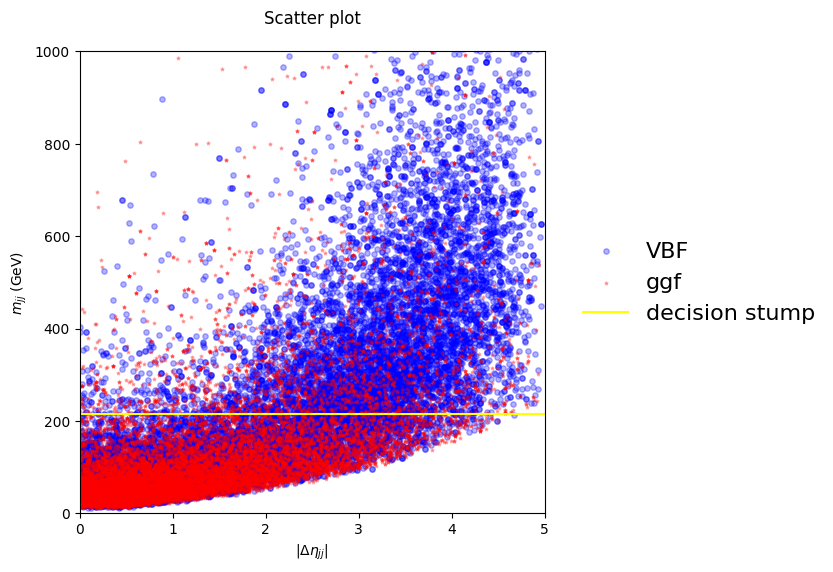

In [19]:
# Scatter plot:
plot_scatter(sig, bkg)

## ***It was fun coding!***